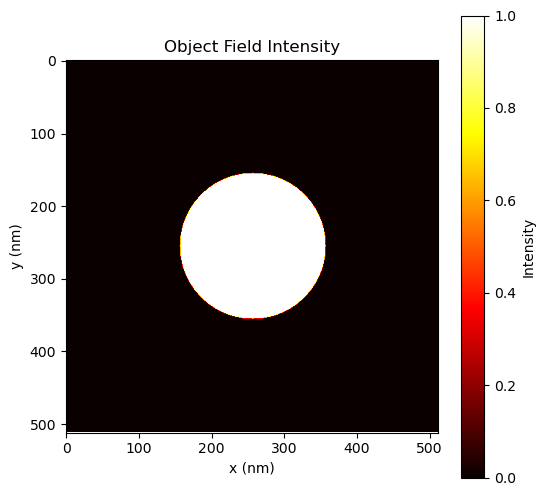

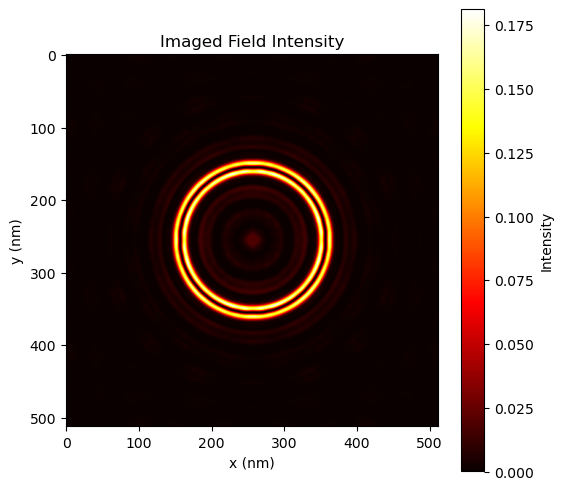

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class FourierOpticsImaging:
    def __init__(self, wavelength, NA_min=0, NA_max=1, zernikes=None):
        self.wavelength = wavelength
        self.NA_min = NA_min
        self.NA_max = NA_max
        self.zernikes = zernikes if zernikes is not None else []
        self.k = 2 * np.pi / wavelength

    def compute_fourier_transform(self, field):
        return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(field)))

    def compute_inverse_fourier_transform(self, field, grid_size):
        return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(field)))

    def apply_pupil_function(self, field, pixel_size, grid_size):
        fx = np.fft.fftshift(np.fft.fftfreq(grid_size, d=pixel_size))
        FX, FY = np.meshgrid(fx, fx)
        F_rho = np.sqrt(FX**2 + FY**2) * self.wavelength
        
        # Apply NA limitation
        pupil_function = (F_rho >= self.NA_min) & (F_rho <= self.NA_max)
        
        # Apply Zernike aberrations if any (Placeholder for implementation)
        if self.zernikes:
            wavefront = np.zeros_like(field, dtype=complex)
            # Placeholder: Add code here to compute wavefront aberrations using Zernike coefficients
            pupil_function = pupil_function * np.exp(1j * wavefront)
        
        field_ft = self.compute_fourier_transform(field)
        field_ft_filtered = field_ft * pupil_function
        image_field = self.compute_inverse_fourier_transform(field_ft_filtered)
        
        res = {
            'obj': field,
            'obj_fft': field_ft,
            'pupil_amp': np.abs(pupil_function),
            'pupil_phase': np.angle(pupil_function),
            'image_fft': field_ft_filtered,
            'image': image_field
        }
        
        return res

    def imaging(self, object_field, pixel_size, grid_size):
        return self.apply_pupil_function(object_field, pixel_size, grid_size)

    def display_intensity(self, field, title="Intensity Distribution"):
        intensity = np.abs(field) ** 2
        plt.figure(figsize=(6, 6))
        plt.imshow(intensity, cmap='hot')
        plt.title(title)
        plt.xlabel("x (nm)")
        plt.ylabel("y (nm)")
        plt.colorbar(label="Intensity")
        plt.show()

# Example usage
if __name__ == "__main__":
    wavelength = 13.5  # 13.5 nm  
    pixel_size = 1  # 1 nanometer
    grid_size = 512      # 512x512 grid
    NA_min = 0.2       # Minimum numerical aperture
    NA_max = 1        # Maximum numerical aperture
    zernikes = [0.1, -0.05, 0.02]  # Example Zernike coefficients
    
    optics = FourierOpticsImaging(wavelength, NA_min, NA_max, zernikes)
    
    # Create an input field (e.g., a circular aperture)
    X, Y = np.meshgrid(np.linspace(-grid_size / 2, grid_size / 2 - 1, grid_size) * pixel_size,
                       np.linspace(-grid_size / 2, grid_size / 2 - 1, grid_size) * pixel_size)
    aperture_radius = 100  # 100 nanometers
    object_field = np.sqrt(X**2 + Y**2) <= aperture_radius
    
    # Perform imaging
    results = optics.imaging(object_field, pixel_size, grid_size)
    
    # Display the intensity distribution
    optics.display_intensity(results['obj'], title="Object Field Intensity")
    optics.display_intensity(results['image'], title="Imaged Field Intensity")

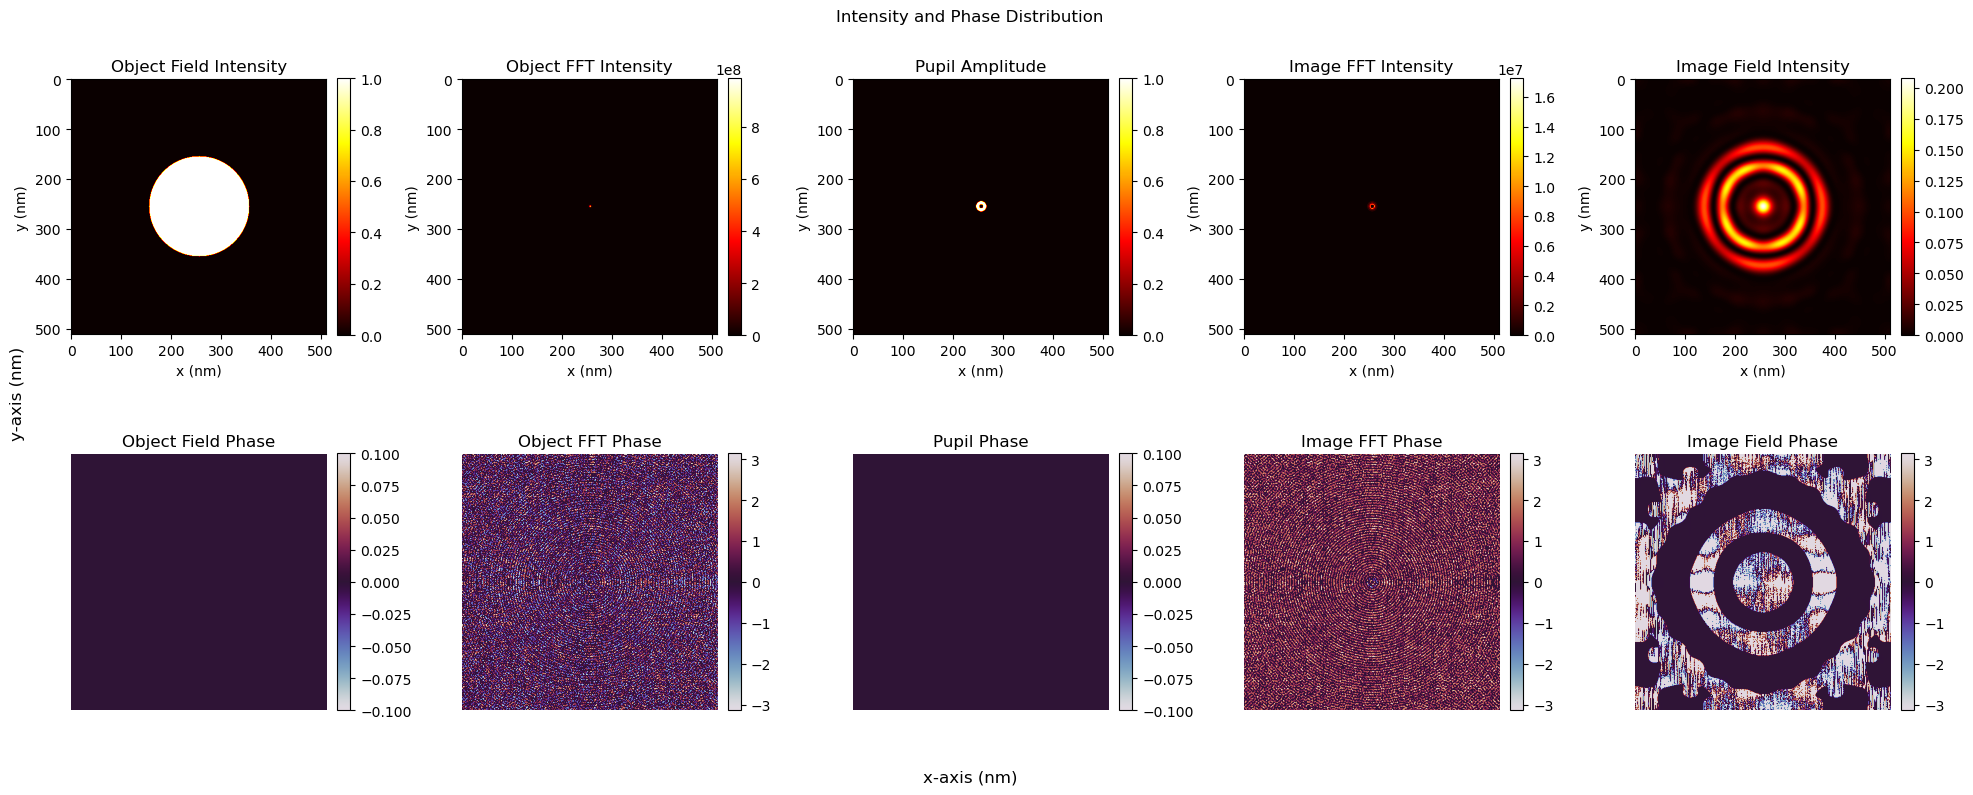

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class FourierOpticsImaging:
    def __init__(self, wavelength, NA_min=0, NA_max=1, zernikes=None):
        """
        Initialize the FourierOpticsImaging class.
        
        Parameters:
        wavelength : float
            Wavelength of the light (in nanometers).
        NA_min : float
            Minimum numerical aperture (default is 0).
        NA_max : float
            Maximum numerical aperture (default is 1).
        zernikes : list
            List of Zernike coefficients for wavefront aberrations.
        """
        self.wavelength = wavelength
        self.NA_min = NA_min
        self.NA_max = NA_max
        self.zernikes = zernikes if zernikes is not None else []
        self.k = 2 * np.pi / wavelength

    def compute_fourier_transform(self, field, pixel_size):
        """
        Compute the Fourier transform of the input field.
        
        Parameters:
        field : ndarray
            Complex electric field distribution in the input plane.
        pixel_size : float
            Size of each pixel in the input grid (in nanometers).
            
        Returns:
        ndarray
            Fourier-transformed field.
        """
        return np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(field)))

    def compute_inverse_fourier_transform(self, field, grid_size):
        """
        Compute the inverse Fourier transform of the input field.
        
        Parameters:
        field : ndarray
            Complex electric field distribution in the frequency domain.
        grid_size : int
            Number of pixels along one dimension of the grid.
            
        Returns:
        ndarray
            Inverse Fourier-transformed field.
        """
        return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(field)))

    def apply_pupil_function(self, field, pixel_size, grid_size):
        """
        Apply a pupil function to the electric field, considering NA limitation and wavefront aberrations.
        
        Parameters:
        field : ndarray
            Complex electric field distribution in the input plane.
        pixel_size : float
            Size of each pixel in the input grid (in nanometers).
        grid_size : int
            Number of pixels along one dimension of the grid.
            
        Returns:
        dict
            Dictionary containing various results from the imaging process.
        """
        fx = np.fft.fftshift(np.fft.fftfreq(grid_size, d=pixel_size))
        FX, FY = np.meshgrid(fx, fx)
        F_rho = np.sqrt(FX**2 + FY**2) * self.wavelength
        
        # Apply NA limitation
        pupil_function = (F_rho >= self.NA_min) & (F_rho <= self.NA_max)
        
        # Apply Zernike aberrations if any (Placeholder for implementation)
        if self.zernikes:
            wavefront = np.zeros_like(field, dtype=complex)
            # Placeholder: Add code here to compute wavefront aberrations using Zernike coefficients
            pupil_function = pupil_function * np.exp(1j * wavefront)
        
        field_ft = self.compute_fourier_transform(field, pixel_size)
        field_ft_filtered = field_ft * pupil_function
        image_field = self.compute_inverse_fourier_transform(field_ft_filtered, grid_size)
        
        res = {
            'obj': field,
            'obj_fft': field_ft,
            'pupil_amp': np.abs(pupil_function),
            'pupil_phase': np.angle(pupil_function),
            'image_fft': field_ft_filtered,
            'image': image_field
        }
        
        return res

    def imaging(self, object_field, pixel_size, grid_size):
        """
        Perform imaging of the object field through an optical system.
        
        Parameters:
        object_field : ndarray
            Complex electric field distribution in the objective plane to be imaged.
        pixel_size : float
            Size of each pixel in the input grid (in nanometers).
        grid_size : int
            Number of pixels along one dimension of the grid.
            
        Returns:
        dict
            Dictionary containing various results from the imaging process.
        """
        return self.apply_pupil_function(object_field, pixel_size, grid_size)

    def display_intensity(self, field, title="Intensity Distribution"):
        """
        Display the intensity of the given electric field.
        
        Parameters:
        field : ndarray
            Complex electric field distribution.
        title : str
            Title of the plot.
        """
        intensity = np.abs(field) ** 2
        plt.figure(figsize=(6, 6))
        plt.imshow(intensity, cmap='hot')
        plt.title(title)
        plt.xlabel("x (nm)")
        plt.ylabel("y (nm)")
        plt.colorbar(label="Intensity")
        plt.show()

    def plot_results(self, results):
        """
        Plot the results in a 2x5 grid, showing intensity and phase.
        
        Parameters:
        results : dict
            Dictionary containing various results from the imaging process.
        """
        fig, axes = plt.subplots(2, 5, figsize=(20, 8))
        
        # Top row: intensity plots
        intensity_titles = ["Object Field Intensity", "Object FFT Intensity", "Pupil Amplitude", "Image FFT Intensity", "Image Field Intensity"]
        fields_intensity = [results['obj'], results['obj_fft'], results['pupil_amp'], results['image_fft'], results['image']]
        
        for i, (ax, field, title) in enumerate(zip(axes[0], fields_intensity, intensity_titles)):
            intensity = np.abs(field) ** 2 if i != 2 else field  # Pupil amplitude doesn't need to be squared
            im = ax.imshow(intensity, cmap='hot')
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            ax.set_title(title)
            
            ax.set_xlabel("x (nm)")
            ax.set_ylabel("y (nm)")
        
        # Bottom row: phase plots
        phase_titles = ["Object Field Phase", "Object FFT Phase", "Pupil Phase", "Image FFT Phase", "Image Field Phase"]
        fields_phase = [results['obj'], results['obj_fft'], results['pupil_phase'], results['image_fft'], results['image']]
        
        for ax, field, title in zip(axes[1], fields_phase, phase_titles):
            phase = np.angle(field)
            im = ax.imshow(phase, cmap='twilight')
            fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            ax.set_title(title)
            ax.axis('off')
            ax.set_xlabel("x (nm)")
            ax.set_ylabel("y (nm)")
        
        fig.supxlabel('x-axis (nm)')
        fig.supylabel('y-axis (nm)')
        fig.suptitle('Intensity and Phase Distribution')
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    wavelength = 13.5  # 13.5 nm  
    pixel_size = 1  # 1 nanometer
    grid_size = 512      # 512x512 grid
    NA_min = 0.1       # Minimum numerical aperture
    NA_max = 0.27      # Maximum numerical aperture
    zernikes = [0.1, -0.05, 0.02]  # Example Zernike coefficients
    
    optics = FourierOpticsImaging(wavelength, NA_min, NA_max, zernikes)
    
    # Create an input field (e.g., a circular aperture)
    X, Y = np.meshgrid(np.linspace(-grid_size / 2, grid_size / 2 - 1, grid_size) * pixel_size,
                       np.linspace(-grid_size / 2, grid_size / 2 - 1, grid_size) * pixel_size)
    aperture_radius = 100  # 100 nanometers
    object_field = np.sqrt(X**2 + Y**2) <= aperture_radius
    
    # Perform imaging
    results = optics.imaging(object_field, pixel_size, grid_size)
    
    # Plot the results
    optics.plot_results(results)

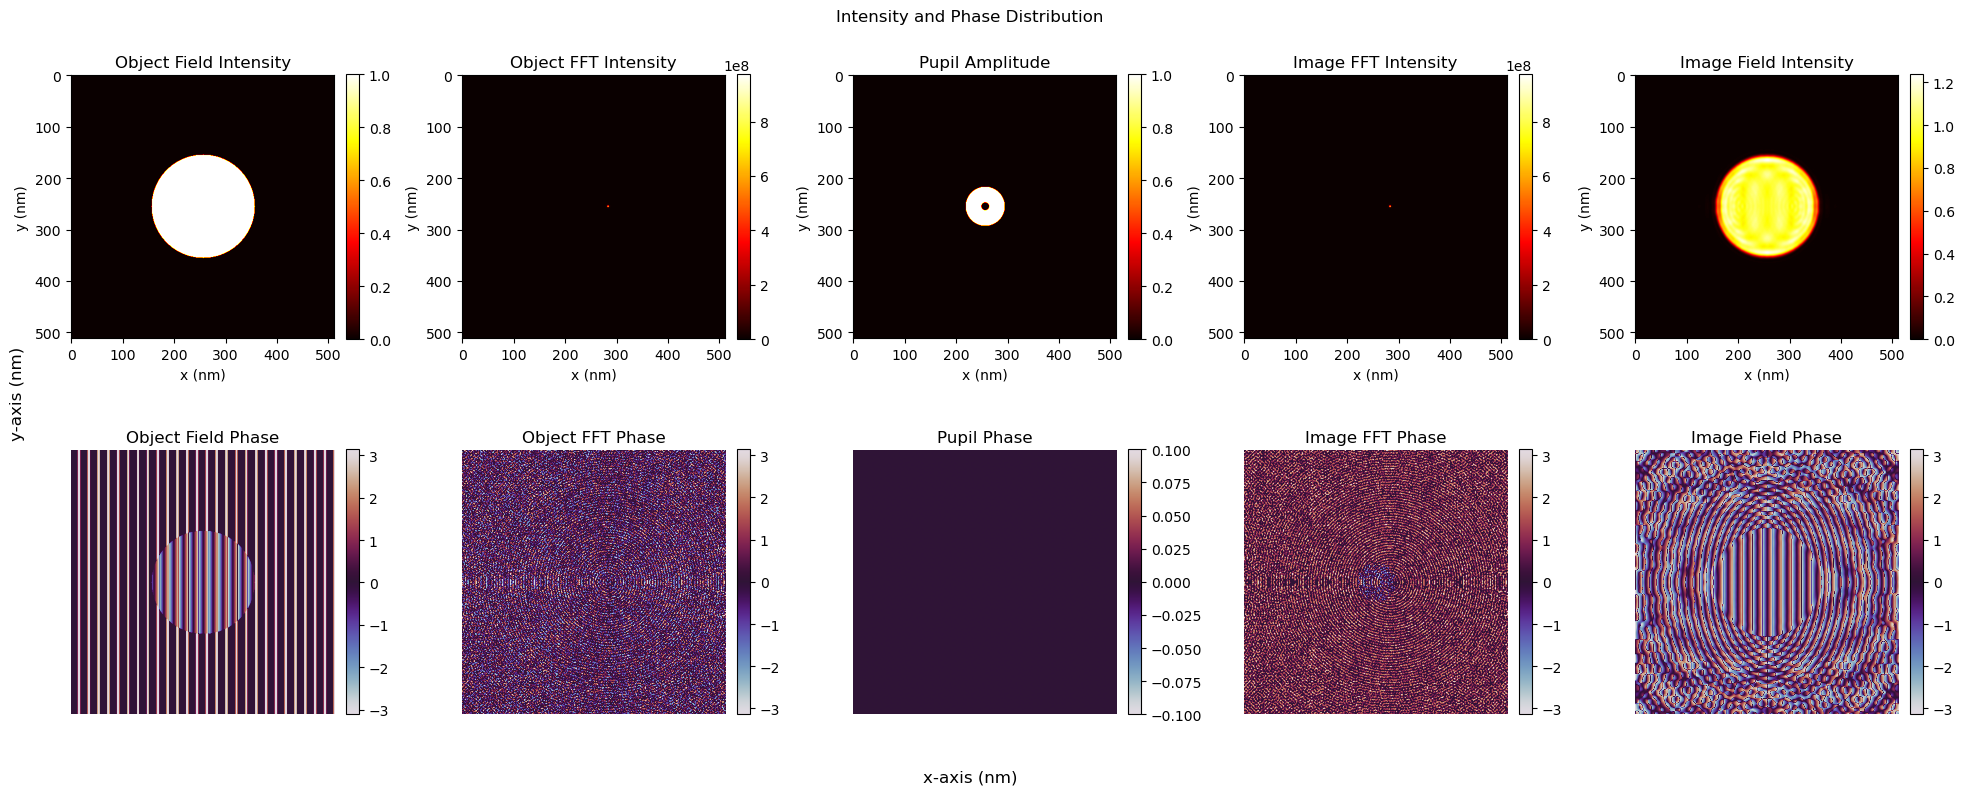

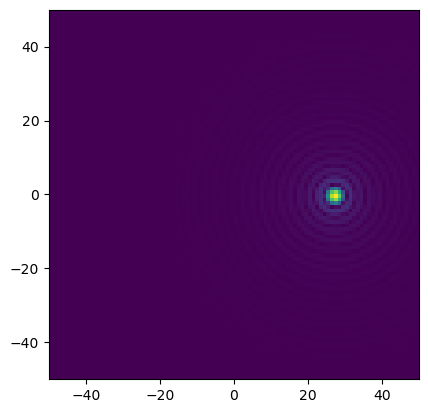

In [19]:
import numpy as np

def create_object_field(grid_size, pixel_size, aperture_radius, wavelength=None, incident_angle=None):
    """
    Create an object field with an optional tilt phase factor to simulate an incident angle.
    
    Parameters:
    grid_size : int
        Number of pixels along one dimension of the grid.
    pixel_size : float
        Size of each pixel in the input grid (in nanometers).
    aperture_radius : float
        Radius of the circular aperture (in nanometers).
    wavelength : float, optional
        Wavelength of the light (in nanometers).
    incident_angle : float, optional
        Incident angle of the incoming wave (in degrees).
        
    Returns:
    ndarray
        Complex electric field distribution in the object plane.
    """
    X, Y = np.meshgrid(np.linspace(-grid_size / 2, grid_size / 2 - 1, grid_size) * pixel_size,
                       np.linspace(-grid_size / 2, grid_size / 2 - 1, grid_size) * pixel_size)
    object_field = np.sqrt(X**2 + Y**2) <= aperture_radius
    
    # Add a tilt phase factor if wavelength and incident angle are provided
    if wavelength is not None and incident_angle is not None:
        k = 2 * np.pi / wavelength  # Wavenumber
        incident_angle_rad = np.radians(incident_angle)
        tilt_phase = np.exp(1j * k * (X * np.sin(incident_angle_rad)))
        object_field = object_field * tilt_phase
    
    return object_field
NA_min = 0.2       # Minimum numerical aperture
NA_max = 1        # Maximum numerical aperture
optics = FourierOpticsImaging(wavelength, NA_min, NA_max, zernikes)
object_field = create_object_field(512, 1, 100, wavelength=13.5, incident_angle=45)
results = optics.imaging(object_field, pixel_size, grid_size)
# object_field = create_object_field(grid_size, pixel_size, aperture_radius, wavelength=None, incident_angle=None)
    # Plot the results
optics.plot_results(results)
fft = results['obj_fft']
center = fft.shape[0]//2
plt.imshow(np.abs(fft[center-50:center+50,center-50:center+50]),extent=[-50,50,-50,50])

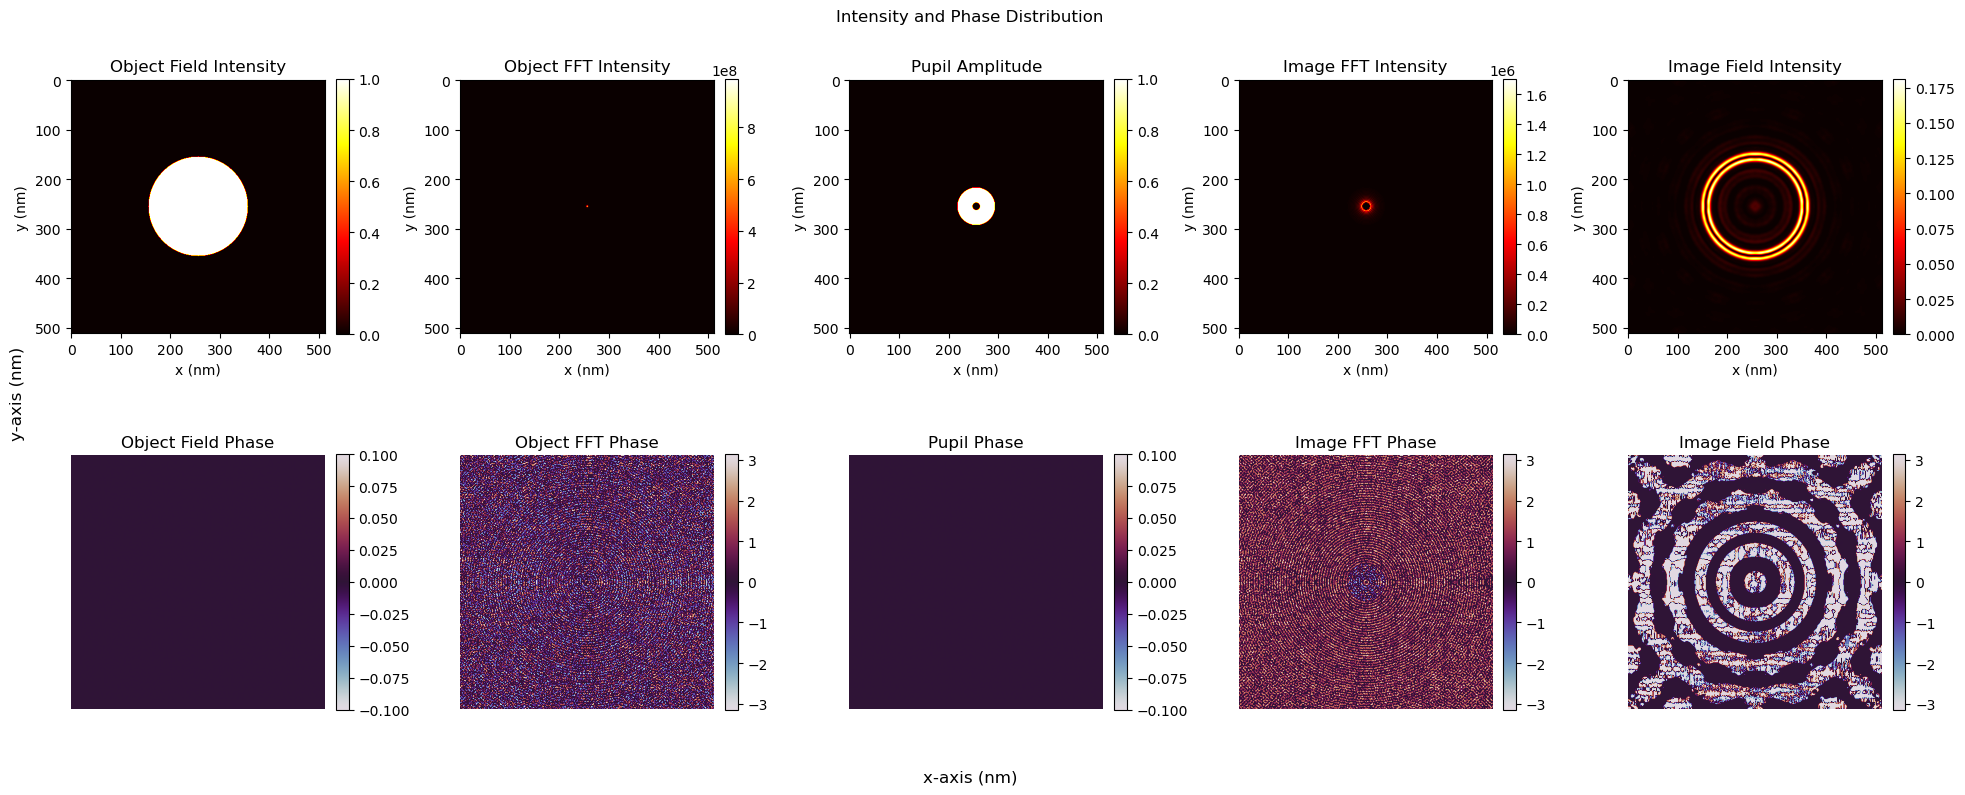

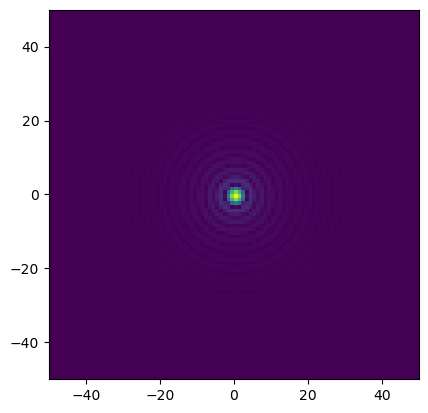

In [20]:
object_field = create_object_field(512, 1, 100, wavelength=13.5, incident_angle=0)
results = optics.imaging(object_field, pixel_size, grid_size)
# object_field = create_object_field(grid_size, pixel_size, aperture_radius, wavelength=None, incident_angle=None)
    # Plot the results
optics.plot_results(results)
fft = results['obj_fft']
center = fft.shape[0]//2
plt.imshow(np.abs(fft[center-50:center+50,center-50:center+50]),extent=[-50,50,-50,50])

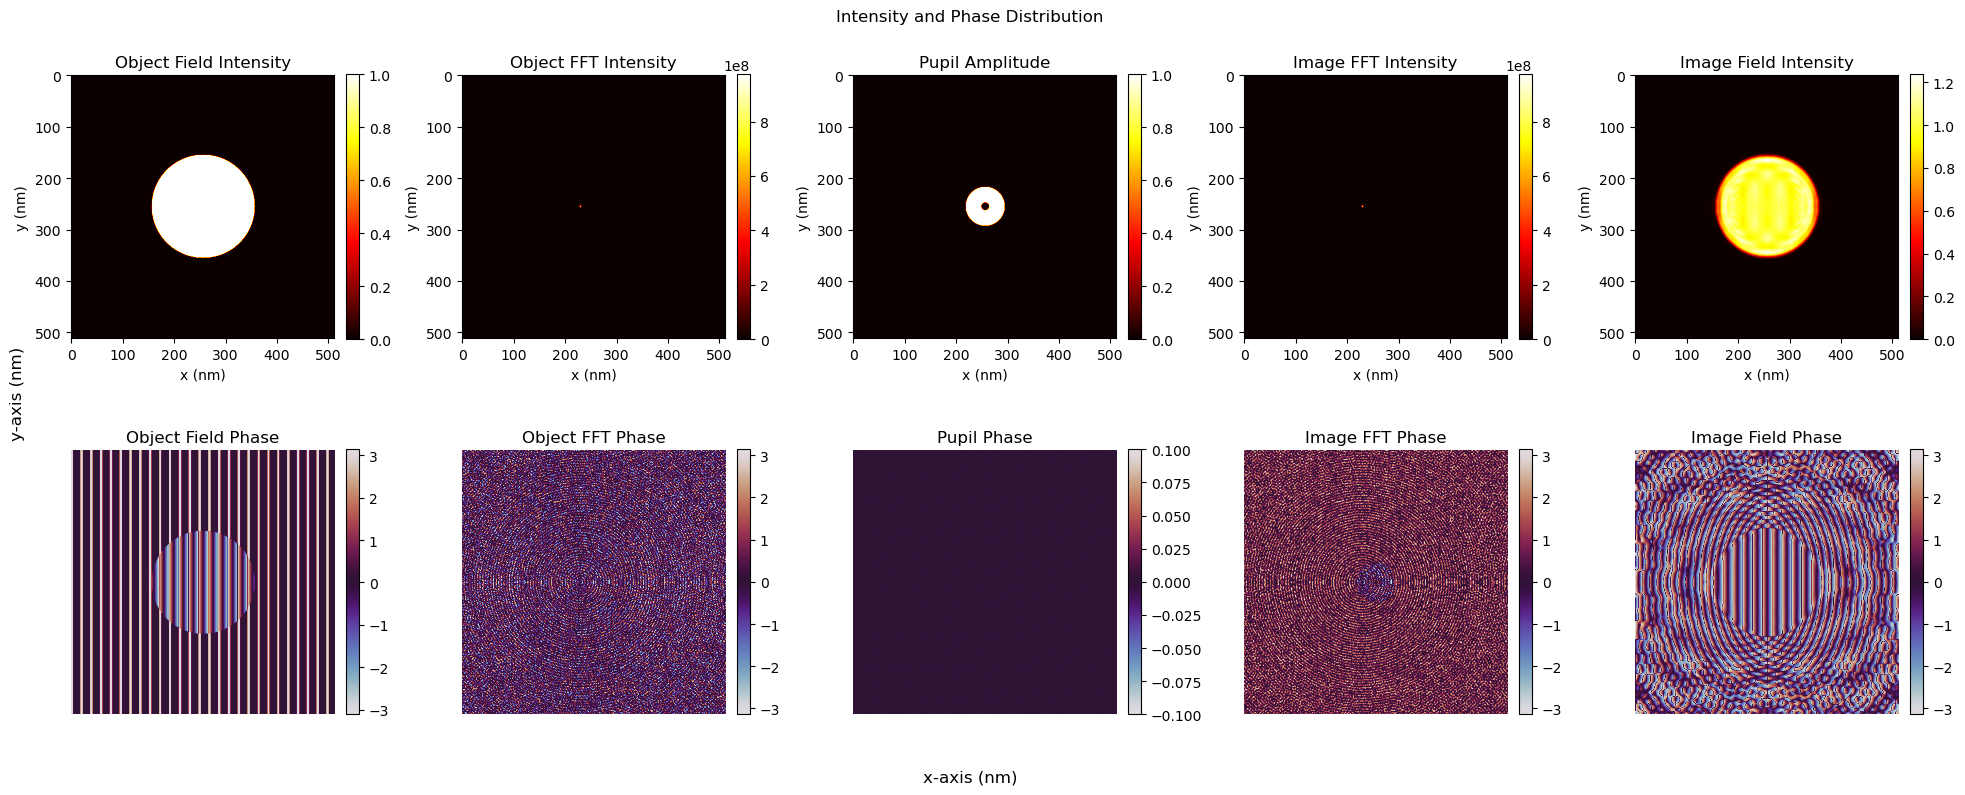

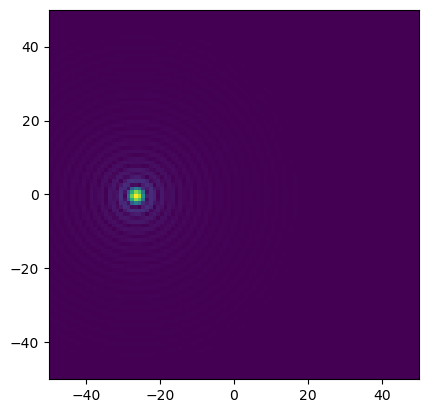

In [21]:
object_field = create_object_field(512, 1, 100, wavelength=13.5, incident_angle=-45)
results = optics.imaging(object_field, pixel_size, grid_size)
# object_field = create_object_field(grid_size, pixel_size, aperture_radius, wavelength=None, incident_angle=None)
    # Plot the results
optics.plot_results(results)
fft = results['obj_fft']
center = fft.shape[0]//2
plt.imshow(np.abs(fft[center-50:center+50,center-50:center+50]),extent=[-50,50,-50,50])